<h2>
Team leader: Jiaqin Kang<br>
Student ID: 33656491<br>
Team member : Aromal Shiney<br>
student id: 33659221<br>
</h2>

### Part B: Credit Card Analysis
***

<h3> Defining the Problem</h3>
<p> The original problem given was to find a model that could successfully predict the credit risk based on the credit card data. This is a classification problem. The target class was called "credit card default payment" with two responses either yes(1) or no(0). One of the hypothesis given was that the data given is sufficient enough to predict the credit risk.</p>

## The dataset
<p> The dataset given to us had 30000 records of credit card data. There were a total of 24 features that could help predict the target variable. The features are listed below. The dataset is already seperated into training and testing.</p>


X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.<br>
X2: Gender (1 = male; 2 = female).<br>
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).<br>
X4: Marital status (1 = married; 2 = single; 3 = others).<br>
X5: Age (year).<br>
X6 - X11: History of past payment. One tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; 
X7 = the repayment status in August, 2005; . . .;
X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.<br>
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.<br>
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.<br>

## Choosing a Measure of Success
<p> In order to measure the success of the model we will be using binary classification metrics such as accuracy, confusion matrix, recall, precision and F1-score. These metrics will help us to predict how close our prediction to our target variable.</p>

## Evaluation Protocol
 The training data and testing data is already split into 50% training and 50% on testing data. This evaluation protocol will help us to successfully train on the train set and test on the test set.

### Algorithms used for Classification

- [x] k-Nearest Neighbours, 
- [x] Decision Trees, 
- [x] Random Forest, 
- [x] Bagging, 
- [x] AdaBoost, 
- [x] and SVM. 

## Dataset Preparation

### Dataset preprocessing and Data Cleansing
<p> In this step we will be cleaning the data and then preprocess them so that they can be fed into the machine learning models. This is an important step in the machine learning workflow to ensure that data is cleaned, correctly scaled and featured into correct format. Machine Learning libraries such as Scikit-learn will be used exclusively to help with this process. Before we can clean and preprocess the data, Firstly we will have to load the data into the pandas dataframe. Using the pandas dataframe we will be able to access useful information about the dataset and analyse the data throughly.</p>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('creditdefault_train.csv')
df.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,0,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
2,0,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
3,0,50000,1,1,2,37,0,0,0,0,...,57608,19394,19619,20024,2500,1815,657,1000,1000,800
4,0,500000,1,1,2,29,0,0,0,0,...,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770


In [3]:
df.shape

(15000, 24)

In [4]:
# check for duplicate column names
df.columns[df.columns.duplicated()]

Index([], dtype='object')

<p> The code block above helps us to visualise the dimension of the  training dataset, it is having two dimensions with 15000 records and 24 features.</p>

0    11682
1     3318
Name: Y, dtype: int64


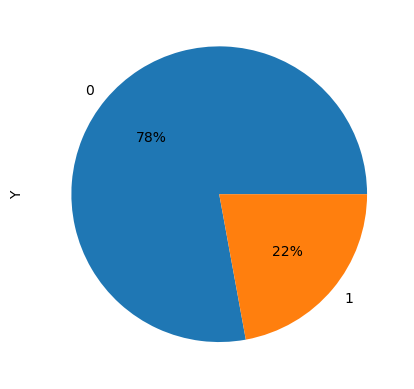

In [5]:
# distupution Y variable
print(df['Y'].value_counts())

# plot a pie chart
import matplotlib.pyplot as plt
df['Y'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

<p> Visualising the distribution of yes and no in the target variable. There are currently 78% of "No" and 22% of "yes" in Y class.

In [6]:
df.describe()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.221200,167450.245333,1.604867,1.850000,1.556200,35.367933,-0.020467,-0.130933,-0.163000,-0.214467,...,47117.562067,43077.445667,40272.922667,38708.685867,5615.960000,5.822059e+03,4942.959000,4997.328867,4798.478400,5226.421267
std,0.415069,130109.925023,0.488896,0.786686,0.522743,9.154118,1.125048,1.198451,1.202606,1.180578,...,69182.434940,64016.907786,60503.339354,59212.425410,15551.708028,2.155675e+04,13629.034736,16499.349511,15463.948485,18099.851948
min,0.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-34041.000000,-170000.000000,-46627.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2733.500000,2392.750000,1800.000000,1200.000000,1000.000000,8.330000e+02,390.000000,290.000000,204.000000,80.000000
50%,0.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,20165.000000,19090.500000,18178.000000,17177.000000,2113.000000,2.014000e+03,1809.000000,1500.000000,1500.000000,1500.000000
75%,0.000000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,60263.250000,54599.500000,50134.750000,49122.750000,5023.250000,5.000000e+03,4571.500000,4048.500000,4019.500000,4000.000000
max,1.000000,800000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,8.000000,8.000000,8.000000,...,855086.000000,706864.000000,587067.000000,568638.000000,493358.000000,1.227082e+06,380478.000000,528897.000000,426529.000000,528666.000000


<p>The describe method in pandas dataframe returns the full description of the data. </p>

## DataSet Cleaning and Preprocessing
<p> The next step will be to clean the data and preprocess them so that they are correctly fed into the machine learning algorithms. Correclty cleaned datasets will lead to better prediction rates and reduce bias forming on the machine learning models.</p>

In [7]:
# check for missing values
df.isnull().sum()

Y      0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
dtype: int64

<p> The code block above checks for the number of null values appearning in the training dataset. There are no null values in the training dataset. </p>

In [8]:
df2 = pd.read_csv('creditdefault_test.csv')
df2.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
1,0,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
2,0,140000,2,3,1,28,0,0,2,0,...,12108,12211,11793,3719,3329,0,432,1000,1000,1000
3,0,20000,1,3,2,35,-2,-2,-2,-2,...,0,0,13007,13912,0,0,0,13007,1122,0
4,0,200000,2,3,2,34,0,0,2,0,...,5535,2513,1828,3731,2306,12,50,300,3738,66


<p> Checking for null values on the test dataset. </p>

In [9]:
# check for missing values
df2.isnull().sum()

Y      0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
dtype: int64

0    11682
1     3318
Name: Y, dtype: int64


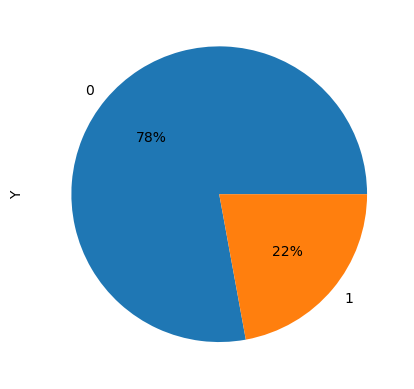

In [10]:
# distupution Y variable
print(df2['Y'].value_counts())

# plot a pie chart
import matplotlib.pyplot as plt
df2['Y'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

In [11]:
df2.describe()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
count,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.221200,167518.40000,1.602600,1.856267,1.547533,35.603067,-0.012933,-0.136600,-0.169400,-0.226867,...,4.690875e+04,43448.452267,40349.879267,39034.834933,5711.201000,6.020268e+03,5508.404000,4654.824867,4800.296867,5204.583867
std,0.415069,129388.71212,0.489376,0.794008,0.521177,9.280067,1.122579,1.195953,1.191133,1.157593,...,6.951809e+04,64648.862167,61091.551799,59895.370421,17516.924518,2.443534e+04,20835.555914,14784.664100,15090.894847,17449.721214
min,0.000000,10000.00000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-1.572640e+05,-50616.000000,-81334.000000,-150953.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,50000.00000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2.639000e+03,2290.500000,1729.500000,1307.750000,980.750000,8.327500e+02,390.750000,300.000000,286.750000,156.750000
50%,0.000000,140000.00000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,2.004050e+04,19012.500000,18025.000000,16924.000000,2100.000000,2.004000e+03,1800.000000,1500.000000,1519.000000,1500.000000
75%,0.000000,240000.00000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,6.000650e+04,54407.000000,50247.250000,49327.000000,5001.000000,5.000000e+03,4500.000000,4001.500000,4041.250000,4007.000000
max,1.000000,1000000.00000,2.000000,6.000000,3.000000,79.000000,8.000000,7.000000,8.000000,8.000000,...,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,417990.000000,527143.000000


### One-Hot Encoding the X2, X3, X4 columns

<p> One-Hot Encoding is a encoding technique that is use to convert the categorical data into numerical format so that they can be used on the machine learning models. In one-hot encoding a binary vector is used to represent the categorical values where if the value is present in the current row then a 1 is given and the 0 is given to all other values that are not present.</p>

In [12]:
# one hot encoding
x2_encoded = pd.get_dummies(df, columns=[ 'X2']) # male or female
# concat the encoded data with the original data
df = pd.concat([df, x2_encoded], axis=1)
# drop the original columns
df = df.drop(['X2'], axis=1)
df.head()

,Y,X1,X3,X4,X5,X6,X7,X8,X9,X10,...,X16,X17,X18,X19,X20,X21,X22,X23,X2_1,X2_2
0,1,20000,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,0,1
1,0,50000,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,1
2,0,50000,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,1,0
3,0,50000,1,2,37,0,0,0,0,0,...,19619,20024,2500,1815,657,1000,1000,800,1,0
4,0,500000,1,2,29,0,0,0,0,0,...,483003,473944,55000,40000,38000,20239,13750,13770,1,0


In [13]:
# one hot encoding
x3_encoded =pd.get_dummies(df, columns=[ 'X3']) # education: 1 = graduate school; 2 = university; 3 = high school; 4 = others
# concat the encoded data with the original data
df = pd.concat([df, x3_encoded], axis=1)
# drop the original columns
df = df.drop(['X3'], axis=1)
df.head()

,Y,X1,X4,X5,X6,X7,X8,X9,X10,X11,...,X3_4,X3_5,X3_6,X3_0,X3_1,X3_2,X3_3,X3_4,X3_5,X3_6
0,1,20000,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,0,1,0,0,0,0
1,0,50000,1,37,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,50000,1,57,-1,0,-1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,50000,2,37,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,500000,2,29,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [14]:
# one hot encoding
x4_encoded =pd.get_dummies(df, columns=[ 'X4']) # marriage: 1 = married; 2 = single; 3 = others
# concat the encoded data with the original data
df = pd.concat([df, x4_encoded], axis=1)
# drop the original columns
df = df.drop(['X4'], axis=1)
df.head()

,Y,X1,X5,X6,X7,X8,X9,X10,X11,X12,...,X4_2,X4_3,X4_0,X4_1,X4_2,X4_3,X4_0,X4_1,X4_2,X4_3
0,1,20000,24,2,2,-1,-1,-2,-2,3913,...,0,0,0,1,0,0,0,1,0,0
1,0,50000,37,0,0,0,0,0,0,46990,...,0,0,0,1,0,0,0,1,0,0
2,0,50000,57,-1,0,-1,0,0,0,8617,...,0,0,0,1,0,0,0,1,0,0
3,0,50000,37,0,0,0,0,0,0,64400,...,1,0,0,0,1,0,0,0,1,0
4,0,500000,29,0,0,0,0,0,0,367965,...,1,0,0,0,1,0,0,0,1,0


In [15]:
# one hot encoding for test data x2, x3, x4
x2_encoded_test = pd.get_dummies(df2, columns=[ 'X2']) # male or female
# concat the encoded data with the original data
df2 = pd.concat([df2, x2_encoded_test], axis=1)
# drop the original columns
df2 = df2.drop(['X2'], axis=1)
df2.head()

,Y,X1,X3,X4,X5,X6,X7,X8,X9,X10,...,X16,X17,X18,X19,X20,X21,X22,X23,X2_1,X2_2
0,1,120000,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,0,1
1,0,90000,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,1
2,0,140000,3,1,28,0,0,2,0,0,...,11793,3719,3329,0,432,1000,1000,1000,0,1
3,0,20000,3,2,35,-2,-2,-2,-2,-1,...,13007,13912,0,0,0,13007,1122,0,1,0
4,0,200000,3,2,34,0,0,2,0,0,...,1828,3731,2306,12,50,300,3738,66,0,1


In [16]:
# one hot encoding for test data
x3_encoded_test =pd.get_dummies(df2, columns=[ 'X3']) # education: 1 = graduate school; 2 = university; 3 = high school; 4 = others
# concat the encoded data with the original data
df2 = pd.concat([df2, x3_encoded_test], axis=1)
# drop the original columns
df2 = df2.drop(['X3'], axis=1)
df2.head()

,Y,X1,X4,X5,X6,X7,X8,X9,X10,X11,...,X3_4,X3_5,X3_6,X3_0,X3_1,X3_2,X3_3,X3_4,X3_5,X3_6
0,1,120000,2,26,-1,2,0,0,0,2,...,0,0,0,0,0,1,0,0,0,0
1,0,90000,2,34,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,140000,1,28,0,0,2,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,20000,2,35,-2,-2,-2,-2,-1,-1,...,0,0,0,0,0,0,1,0,0,0
4,0,200000,2,34,0,0,2,0,0,-1,...,0,0,0,0,0,0,1,0,0,0


In [17]:
# one hot encoding for test data
x4_encoded_test =pd.get_dummies(df2, columns=[ 'X4']) # marriage: 1 = married; 2 = single; 3 = others
# concat the encoded data with the original data
df2 = pd.concat([df2, x4_encoded_test], axis=1)
# drop the original columns
df2 = df2.drop(['X4'], axis=1)
df2.head()

,Y,X1,X5,X6,X7,X8,X9,X10,X11,X12,...,X4_2,X4_3,X4_0,X4_1,X4_2,X4_3,X4_0,X4_1,X4_2,X4_3
0,1,120000,26,-1,2,0,0,0,2,2682,...,1,0,0,0,1,0,0,0,1,0
1,0,90000,34,0,0,0,0,0,0,29239,...,1,0,0,0,1,0,0,0,1,0
2,0,140000,28,0,0,2,0,0,0,11285,...,0,0,0,1,0,0,0,1,0,0
3,0,20000,35,-2,-2,-2,-2,-1,-1,0,...,1,0,0,0,1,0,0,0,1,0
4,0,200000,34,0,0,2,0,0,-1,11073,...,1,0,0,0,1,0,0,0,1,0


Due to pd.concat bug, when assign df with concated df and encoded df, it creates a duplication in the dataframe, therefore drop the duplicated columns after one hot encoded the dataframes is needed.

In [18]:
# drop the duplicate columns
df = df.loc[:,~df.columns.duplicated()]
df.head()

# drop the duplicate columns
df2 = df2.loc[:,~df2.columns.duplicated()]
df2.head()

,Y,X1,X5,X6,X7,X8,X9,X10,X11,X12,...,X3_1,X3_2,X3_3,X3_4,X3_5,X3_6,X4_0,X4_1,X4_2,X4_3
0,1,120000,26,-1,2,0,0,0,2,2682,...,0,1,0,0,0,0,0,0,1,0
1,0,90000,34,0,0,0,0,0,0,29239,...,0,1,0,0,0,0,0,0,1,0
2,0,140000,28,0,0,2,0,0,0,11285,...,0,0,1,0,0,0,0,1,0,0
3,0,20000,35,-2,-2,-2,-2,-1,-1,0,...,0,0,1,0,0,0,0,0,1,0
4,0,200000,34,0,0,2,0,0,-1,11073,...,0,0,1,0,0,0,0,0,1,0


In [19]:
# confirm the shape of the data
df.shape
df2.shape

(15000, 34)

#### Splitting Predictors and Target variable in both training set and test set

In [20]:
# define X and y for training data and testing data (df and df2)
X_train = df.drop('Y', axis=1)
y_train = df['Y']

X_test = df2.drop('Y', axis=1)
y_test = df2['Y']

# print the shapes of X_train, y_train, X_test, y_test
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(15000, 33)
(15000,)
(15000, 33)
(15000,)


### Scale the Xtrain and Xtest
<p> The next step would be to scale the values of both Xtrain and Xtest using the StandardScaler function from the sklearn library. Scaling is an important preprocessing technique which will reduce the distance between the data points helping the algorithms to learn faster.</p>

In [21]:
# Scale the training and testing data using 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

--------------------

## K-Nearest Neighbours
<p> K-Nearest Neighbour is a supervised learning algorithm which uses proximity to make classifications. K-nearest neighbour works with an assumption that the data points are near to each other. In KNN the distance between the data points are measured by distance measures such as Manhattan distance, Euclidian Distance and Minkowski Distance. </p>

In [61]:
# import knn and gridsearch
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [62]:
# knn model
knn = KNeighborsClassifier()

knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [63]:
knn_grid_params = { 'algorithm': ['auto'],
                    'leaf_size': [30, 40, 50],
                    'metric': ['euclidean', 'manhattan'],
                    'n_jobs': [-1],
                    'n_neighbors': [3,5,10],
                    'p': [1, 2],
                    'weights': ['uniform', 'distance'],
                    }

<p> Creating parameters for the gridsearch </p>

In [64]:
# fit the model
knn_grid = GridSearchCV(knn, 
                        knn_grid_params, 
                        cv=5, # 5-fold cross validation
                        verbose=1, 
                        n_jobs=-1
                        )

<p> Fitting the training set on the gridsearch to find the best parameters </p>

In [65]:
# fit the model
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto'], 'leaf_size': [30, 40, 50],
                         'metric': ['euclidean', 'manhattan'], 'n_jobs': [-1],
                         'n_neighbors': [3, 5, 10], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [66]:
# print the best parameters
print(knn_grid.best_params_)
print(knn_grid.best_score_)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'n_jobs': -1, 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
0.8027333333333335


<p> Using the best parameters from the gridsearch, creating a new model and train again on the final KNN model.</p>

In [183]:
# create the model with the best parameters
knn_best = knn_grid.best_estimator_

In [184]:
# make predictions
knn_y_pred = knn_best.predict(X_test)

<p> Tuning the K-nearest neighbour algorithm by changing one of the parameters to measure the performance on test data </p> 

In [69]:
# create the model with the parameters and a manual n_neighbors value 
# {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'n_jobs': -1, 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

knn_check_result = pd.DataFrame(columns=['n_neighbors', 'accuracy', 'precision', 'recall', 'f1'])

for i in range(10, 31):
    neighbors = i
    knn_check = KNeighborsClassifier(algorithm='auto', 
                                     leaf_size=30, 
                                     metric='euclidean', 
                                     n_jobs=-1, 
                                     n_neighbors=neighbors,
                                     p=1, 
                                     weights='uniform')
    knn_check.fit(X_train, y_train)
    knn_check_pred = knn_check.predict(X_test)
    
    # calculate different metrics
    accuracy = accuracy_score(y_test, knn_check_pred)
    precision = precision_score(y_test, knn_check_pred )
    recall = recall_score(y_test, knn_check_pred)
    f1 = f1_score(y_test, knn_check_pred)
    
    # append the results to the dataframe
    knn_check_result = pd.concat([knn_check_result, pd.DataFrame({'n_neighbors': i,
                                                                   'accuracy': accuracy,
                                                                   'precision': precision,
                                                                   'recall': recall,
                                                                   'f1': f1}, index=[0])],
                                 ignore_index=True)

knn_check_result

,n_neighbors,accuracy,precision,recall,f1
0,10,0.805200,0.651840,0.256178,0.367806
1,11,0.807867,0.639744,0.300784,0.409184
2,12,0.806000,0.653614,0.261603,0.373655
3,13,0.807933,0.644415,0.293852,0.403643
4,14,0.807933,0.669249,0.260398,0.374919
5,15,0.808067,0.649625,0.287221,0.398328
6,16,0.806800,0.662539,0.257987,0.371367
7,17,0.807533,0.649342,0.282399,0.393615
8,18,0.806933,0.667727,0.253165,0.367133
9,19,0.808333,0.657876,0.278180,0.391019


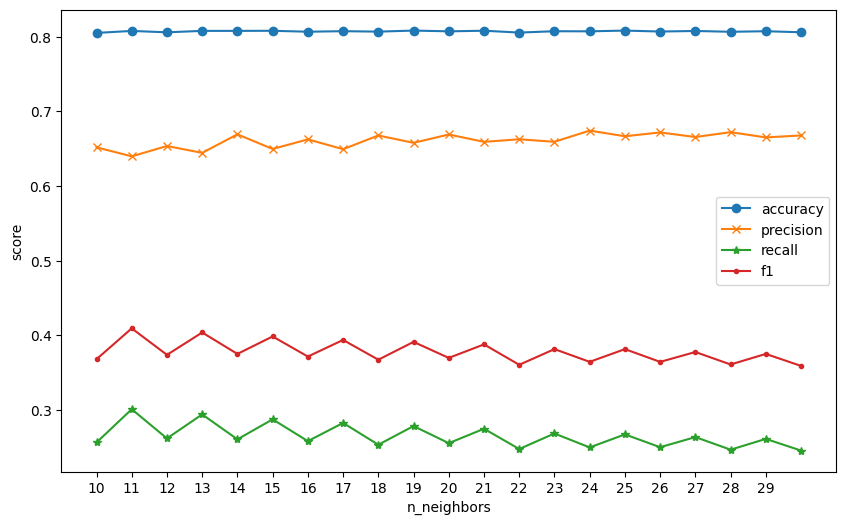

In [70]:
# plot the results
plt.figure(figsize=(10, 6))
plt.plot(knn_check_result['n_neighbors'], knn_check_result['accuracy'], label='accuracy' , marker='o')
plt.plot(knn_check_result['n_neighbors'], knn_check_result['precision'], label='precision', marker='x')
plt.plot(knn_check_result['n_neighbors'], knn_check_result['recall'], label='recall', marker='*')
plt.plot(knn_check_result['n_neighbors'], knn_check_result['f1'], label='f1', marker='.')
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.xticks(range(10, 30)) # set the x axis ticks
plt.legend()
plt.show()

<p> The above graph shows the performance of KNN by increasing the parameter "N_neighbour" from 10 to 30. Accuracy remained constant throughout but evaluation metrics such as precision, recall and F1 score fluctuated throughout. </p>

In [185]:
knn_y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [186]:
y_test

0        1
1        0
2        0
3        0
4        0
        ..
14995    0
14996    0
14997    0
14998    1
14999    1
Name: Y, Length: 15000, dtype: int64

### Confusion Matix
<p> Confusion Matrix is a truth table that is used to evaluate the performance of the model. The table contains information about the actual and predicted values of the model. Confusion matix can be used to build evaluation metrics such as accuracy, f1-score, precision and recall. Each entry in the confusion matrix table represents the number of instances that belong to a particular class. Pandas crosstab method is used to create confusion matrix. </p>

In [187]:
x1 = pd.DataFrame({'True': y_test, 'Predicted': knn_y_pred})
x2 = pd.crosstab(x1['True'], x1['Predicted'])
x2

Predicted,0,1
True,,
0,11228,454
1,2468,850


<p> Visualising the confusion matrix of KNN </p>

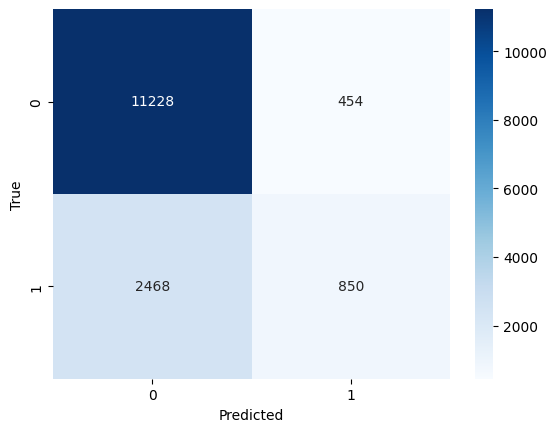

In [188]:
# create a heatmap for the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(x2, annot=True, fmt='d', cmap='Blues')
plt.show()

<p> A custom function is created to calculate the metrics by using the confusion matrix. The function extracts the number of true positives, true negatives, false positives and false negatives and use them to calcuate the evaluation metrics. Finally it returns the result in the form of pandas dataframe.</p>

In [189]:
import pandas as pd

def calculate_metrics(cm):
    TP = cm.iloc[0,0]
    TN = cm.iloc[1,1]
    FP = cm.iloc[1,0]
    FN = cm.iloc[0,1]

    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f1_score = 2*(precision*recall)/(precision+recall)
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    
    metrics_df = pd.DataFrame({
        "Metric": ["TP", "TN", "FP", "FN", "Precision", "Recall", "F1-Score", "Accuracy"],
        "Value": [TP, TN, FP, FN, precision, recall, f1_score, accuracy]
    })
    
    return metrics_df


In [190]:
knn_metrics = calculate_metrics(x2)
print(knn_metrics)

      Metric         Value
0         TP  11228.000000
1         TN    850.000000
2         FP   2468.000000
3         FN    454.000000
4  Precision      0.819801
5     Recall      0.961137
6   F1-Score      0.884861
7   Accuracy      0.805200


<p> The above code block displays the score of K-Nearest Neighbour based on the evaluation metrics.</p>

----------------------

## Decision Tree
<p> Decision Tree is another supervised learning algorithm that builds the model in the form of a tree. This tree consists of roots, branches, interal nodes and leaves. In a decision tree each of the internal node represnts a decision whereas the leaf node represents the class label. The tree is constructed by recursively splitting the data based on the important features. </p>

In [23]:
# import decision tree and gridsearch
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [24]:
decisionTree = DecisionTreeClassifier()
decisionTree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

<p> Getting the parameters for the decision tree to be used on the grid search </p>

In [79]:
decisionTree_grid_params = {'criterion': ['gini', 'entropy','log_loss'], 
                            'splitter': ['best', 'random'],
                            'max_depth': [3, 4, 5],
                            'min_samples_split': [3,5,10],
                            'max_features': ['auto', 'sqrt', 'log2'],
                            'random_state': [42,1 ,14],
                            }

In [80]:
# create the model
decisionTree_grid = GridSearchCV(decisionTree, 
                                decisionTree_grid_params,
                                cv=5, # 5-fold cross validation
                                verbose=1,
                                n_jobs=-1
                                )

<p> Fitting the training dataset on the decision tree gridsearch to find the best parameters.</p>

In [81]:
# FIT the model
decisionTree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


c:\Users\admin\anaconda3\envs\ai\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [3, 5, 10],
                         'random_state': [42, 1, 14],
                         'splitter': ['best', 'random']},
             verbose=1)

In [82]:
# print the best parameters
print(decisionTree_grid.best_params_)
print(decisionTree_grid.best_score_)

{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 10, 'random_state': 14, 'splitter': 'best'}
0.8136666666666665


<p> Using the best parameters obtained from the gridsearch we are going to train the final decision tree model.</p>

In [83]:
# create the model with the best parameters
decisionTree_best = decisionTree_grid.best_estimator_

In [84]:
# predict the model
decisionTree_y_pred = decisionTree_best.predict(X_test)

<p> Checking the performance of the decision tree by manipulating one of the hyperparameters. </p>

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 10, 'random_state': 14, 'splitter': 'best'}

dt_check_result = pd.DataFrame(columns=['min_samples_split', 'accuracy', 'precision', 'recall', 'f1'])

for i in range(10, 31):
    min_split = i
    dt_check = DecisionTreeClassifier(criterion='entropy',
                                        max_depth=4,
                                        max_features='auto',
                                        min_samples_split=min_split,
                                        random_state=14,
                                        splitter='best'
                                    )
    dt_check.fit(X_train, y_train)
    dt_check_pred = dt_check.predict(X_test)
    
    # calculate different metrics
    accuracy = accuracy_score(y_test, dt_check_pred)
    precision = precision_score(y_test,dt_check_pred )
    recall = recall_score(y_test, dt_check_pred)
    f1 = f1_score(y_test, dt_check_pred)
    
    # append the results to the dataframe
    dt_check_result = pd.concat([dt_check_result, pd.DataFrame({'min_samples_split': i,
                                                                   'accuracy': accuracy,
                                                                   'precision': precision,
                                                                   'recall': recall,
                                                                   'f1': f1}, index=[0])],
                                 ignore_index=True)

dt_check_result

c:\ProgramData\Anaconda3\envs\DM\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\DM\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\DM\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\DM\lib\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='s

,min_samples_split,accuracy,precision,recall,f1
0,10,0.8126,0.663232,0.310428,0.422911
1,11,0.8126,0.663232,0.310428,0.422911
2,12,0.8126,0.663232,0.310428,0.422911
3,13,0.8126,0.663232,0.310428,0.422911
4,14,0.8126,0.663232,0.310428,0.422911
5,15,0.8126,0.663232,0.310428,0.422911
6,16,0.8126,0.663232,0.310428,0.422911
7,17,0.8126,0.663232,0.310428,0.422911
8,18,0.8126,0.663232,0.310428,0.422911
9,19,0.8126,0.663232,0.310428,0.422911


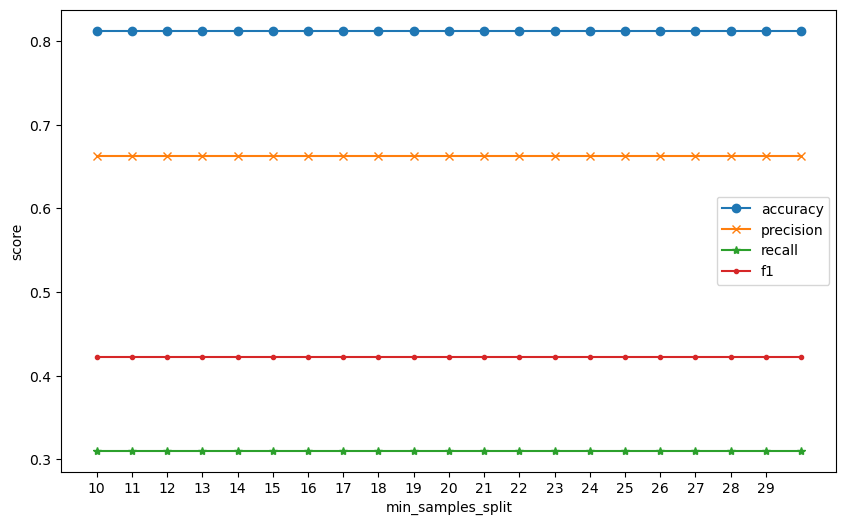

In [28]:
# plot the results
plt.figure(figsize=(10, 6))
plt.plot(dt_check_result['min_samples_split'], dt_check_result['accuracy'], label='accuracy' , marker='o')
plt.plot(dt_check_result['min_samples_split'], dt_check_result['precision'], label='precision', marker='x')
plt.plot(dt_check_result['min_samples_split'], dt_check_result['recall'], label='recall', marker='*')
plt.plot(dt_check_result['min_samples_split'], dt_check_result['f1'], label='f1', marker='.')
plt.xlabel('min_samples_split')
plt.ylabel('score')
plt.xticks(range(10, 30)) # set the x axis ticks
plt.legend()
plt.show()

<p> The graph above shows the result of the Decision tree performance by changing the hyperparameter "min_samples_split". The graph shows consistent performance throughout, this suggests that not much improvement was made by changing the hyperparameter.</p>

In [93]:
x1 = pd.DataFrame({'True': y_test, 'Predicted': decisionTree_y_pred})
x2 = pd.crosstab(x1['True'], x1['Predicted'])
x2

Predicted,0,1
True,,
0,11159,523
1,2288,1030


<p> Visualising the confusion matrix and displaying the outputs</p>

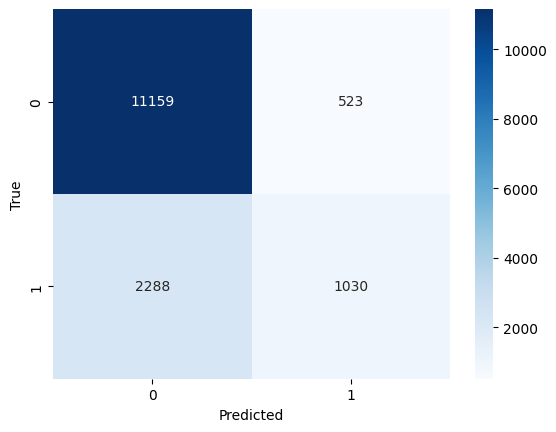

In [94]:
# create a heatmap for the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(x2, annot=True, fmt='d', cmap='Blues')
plt.show()

In [95]:
decisionTree_metrics = calculate_metrics(x2)
print(decisionTree_metrics)

      Metric         Value
0         TP  11159.000000
1         TN   1030.000000
2         FP   2288.000000
3         FN    523.000000
4  Precision      0.829851
5     Recall      0.955230
6   F1-Score      0.888137
7   Accuracy      0.812600


------------

## Random forest
Random Forest is a combination of decision trees to improve the accuracy and reduce the overfitting on individual trees. Multiple trees are made by boostrapping the samples of the original data. With each split of the tree a subset of features are considered. This type of splitting helps to reduce the correlation between the trees and ensures that each of the trees are different from each other providing unique information. </p>

In [96]:
# import random forest and gridsearch
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [97]:
randomForest = RandomForestClassifier()
randomForest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

<p> Getting all the possible parameters of Random Forest that could be used to make gridsearch. </p>

In [99]:
randomForest_grid_params = {'criterion': ['gini', 'entropy','log_loss'],
                            'max_depth': [3, 4,5,10],
                            'min_samples_split': [3,5,10],
                            'max_features': ['auto', 'sqrt', 'log2'],
                            'random_state': [42,1 ,14],
                            'n_estimators': [10, 50]
                            }

In [100]:
# fit the model
randomForest_grid = GridSearchCV(randomForest,
                                randomForest_grid_params,
                                cv=5, # 5-fold cross validation
                                verbose=1,
                                n_jobs=-1
                                )

<p> Fitting the training set on the modified gridsearch to find the best parameters. </p>

In [101]:
# fit the model
randomForest_grid.fit(X_train, y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


c:\Users\admin\anaconda3\envs\ai\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [10, 50],
                         'random_state': [42, 1, 14]},
             verbose=1)

In [102]:
# print the best parameters
print(randomForest_grid.best_params_)
print(randomForest_grid.best_score_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 50, 'random_state': 1}
0.8234


<p> Gridsearch has provided the best parameters, the next step will be to tune the final Random forest model with the newly obtained hyperparamters. </p>

In [103]:
# create the model with the best parameters
randomForest_best = randomForest_grid.best_estimator_

<p> Evaluating the performance of the Random Forest model by changing the "n_estimators" parameter </p>

In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# {'criterion': 'entropy', 
# 'max_depth': 10, 
# 'max_features': 'auto', 
# 'min_samples_split': 10, 
# 'n_estimators': 50, 
# 'random_state': 1}
rf_check_result = pd.DataFrame(columns=['n_estimators', 'accuracy', 'precision', 'recall', 'f1'])

for i in range(50,61):
    n_estimators = i
    rf_check = RandomForestClassifier(criterion='entropy',
                                        max_depth=10,
                                        max_features='auto',
                                        min_samples_split=10,
                                        n_estimators=n_estimators,
                                        random_state=1
                                    )
    rf_check.fit(X_train, y_train)
    rf_check_pred = rf_check.predict(X_test)
    
    # calculate different metrics
    accuracy = accuracy_score(y_test, rf_check_pred)
    precision = precision_score(y_test, rf_check_pred )
    recall = recall_score(y_test, rf_check_pred)
    f1 = f1_score(y_test, rf_check_pred)
    
    # append the results to the dataframe
    rf_check_result = pd.concat([rf_check_result, pd.DataFrame({'n_estimators': i,
                                                                   'accuracy': accuracy,
                                                                   'precision': precision,
                                                                   'recall': recall,
                                                                   'f1': f1}, index=[0])],
                                 ignore_index=True)
    
rf_check_result


c:\Users\admin\anaconda3\envs\ai\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\admin\anaconda3\envs\ai\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
c:\Users\admin\anaconda3\envs\ai\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is als

,n_estimators,accuracy,precision,recall,f1
0,50,0.818267,0.676822,0.341471,0.453926
1,51,0.818067,0.675402,0.341772,0.453872
2,52,0.818200,0.675579,0.342676,0.454709
3,53,0.818000,0.675000,0.341772,0.453782
4,54,0.818400,0.676366,0.343279,0.455418
5,55,0.818667,0.677553,0.343882,0.456218
6,56,0.818667,0.676923,0.344786,0.456869
7,57,0.818467,0.676349,0.343882,0.455944
8,58,0.818133,0.674970,0.342978,0.454836
9,59,0.818333,0.675756,0.343580,0.455544


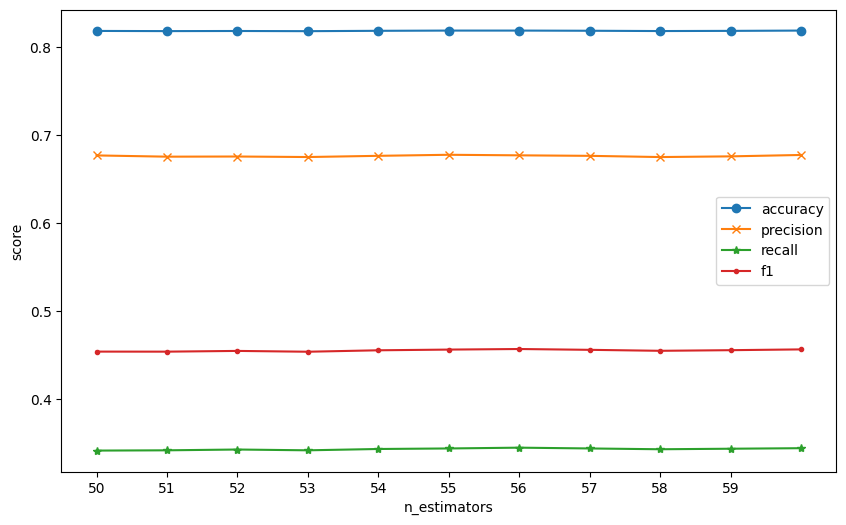

In [111]:
# plot the results
plt.figure(figsize=(10, 6))
plt.plot(rf_check_result['n_estimators'], rf_check_result['accuracy'], label='accuracy' , marker='o')
plt.plot(rf_check_result['n_estimators'], rf_check_result['precision'], label='precision', marker='x')
plt.plot(rf_check_result['n_estimators'], rf_check_result['recall'], label='recall', marker='*')
plt.plot(rf_check_result['n_estimators'], rf_check_result['f1'], label='f1', marker='.')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.xticks(range(50, 60)) # set the x axis ticks
plt.legend()
plt.show()

<p> The graph above shows the results of the Random Forest model on the test set. After modifying the "n_estimators" hyperparameter from 50 t0 60 estimators, it is clear that there was no improvement on the evaluation metrics. </p>

In [106]:
# make predictions
randomForest_y_pred = randomForest_best.predict(X_test)

<p> Creating a Confusion Matrix for evaluating the performance of the model. </p>

In [107]:
x1 = pd.DataFrame({'True': y_test, 'Predicted': randomForest_y_pred})
x2 = pd.crosstab(x1['True'], x1['Predicted'])
x2

Predicted,0,1
True,,
0,11141,541
1,2185,1133


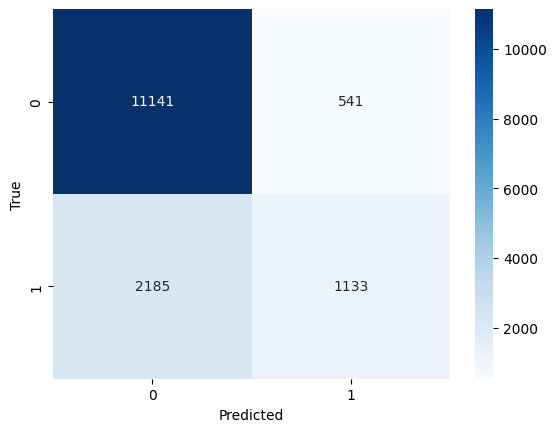

In [108]:
# plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(x2, annot=True, fmt='d', cmap='Blues')
plt.show()

In [109]:
randomForest_metrics = calculate_metrics(x2)

In [110]:
print(randomForest_metrics)

      Metric         Value
0         TP  11141.000000
1         TN   1133.000000
2         FP   2185.000000
3         FN    541.000000
4  Precision      0.836035
5     Recall      0.953689
6   F1-Score      0.890995
7   Accuracy      0.818267


----

## Bagging
<p> Bootstrap Aggregating is an ensemble learning algorithm that reduces the variance among the noisy data points. In bagging, individual data points can be selected more than once. Once all the data points are collected, the weak models are then trained independently. Bagging is an excellent algorithm for overfitting and unstable models.</p>

In [112]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

In [113]:
bagging = BaggingClassifier()

bagging.get_params()

{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

<p> Using the get_params() method we are collecting all possible parameters that could be used for gridsearch. </p>

In [114]:
bagging_grid_params = {'n_estimators': [10, 50],
                        'max_samples': [3, 5, 10],
                        'max_features': [3, 5,10],
                        'random_state': [42,1 ,14]
                        }

In [115]:
# fit the model
bagging_grid = GridSearchCV(bagging,    
                            bagging_grid_params,
                            cv=5, # 5-fold cross validation
                            verbose=1,
                            n_jobs=-1
                            )

<p> Fitting the training set on the gridsearch to find the best parameters</p>

In [116]:
# fit the model
bagging_grid.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'max_features': [3, 5, 10], 'max_samples': [3, 5, 10],
                         'n_estimators': [10, 50],
                         'random_state': [42, 1, 14]},
             verbose=1)

In [117]:
# print the best parameters
print(bagging_grid.best_params_)
print(bagging_grid.best_score_)

{'max_features': 10, 'max_samples': 10, 'n_estimators': 50, 'random_state': 1}
0.7832


In [118]:
# create the model with the best parameters
bagging_best = bagging_grid.best_estimator_

<p> Evaluating the performance of bagging by manipulating one of the hyperparameters. </p>

In [119]:
bag_check_result = pd.DataFrame(columns=['n_estimators', 'accuracy', 'precision', 'recall', 'f1'])
# {'max_features': 10, 'max_samples': 10, 'n_estimators': 50, 'random_state': 1}
for i in range(50,61):
    n_estimators = i
    bag_check = BaggingClassifier(n_estimators=n_estimators,
                                    max_samples=10,
                                    max_features=10,
                                    random_state=1
                                    )
    bag_check.fit(X_train, y_train)
    bag_check_pred = bag_check.predict(X_test)
    
    # calculate different metrics
    accuracy = accuracy_score(y_test, bag_check_pred)
    precision = precision_score(y_test, bag_check_pred )
    recall = recall_score(y_test, bag_check_pred)
    f1 = f1_score(y_test, bag_check_pred)
    
    # append the results to the dataframe
    bag_check_result = pd.concat([bag_check_result, pd.DataFrame({'n_estimators': i,
                                                                   'accuracy': accuracy,
                                                                   'precision': precision,
                                                                   'recall': recall,
                                                                   'f1': f1}, index=[0])],
                                 ignore_index=True)
    
bag_check_result

,n_estimators,accuracy,precision,recall,f1
0,50,0.788000,0.719745,0.068113,0.124449
1,51,0.788000,0.719745,0.068113,0.124449
2,52,0.785067,0.728155,0.045208,0.085131
3,53,0.787733,0.739286,0.062387,0.115064
4,54,0.787800,0.741935,0.062387,0.115096
5,55,0.788067,0.738832,0.064798,0.119147
6,56,0.784933,0.739583,0.042797,0.080912
7,57,0.785267,0.741294,0.044907,0.084683
8,58,0.784733,0.732984,0.042194,0.079795
9,59,0.787400,0.741573,0.059675,0.110460


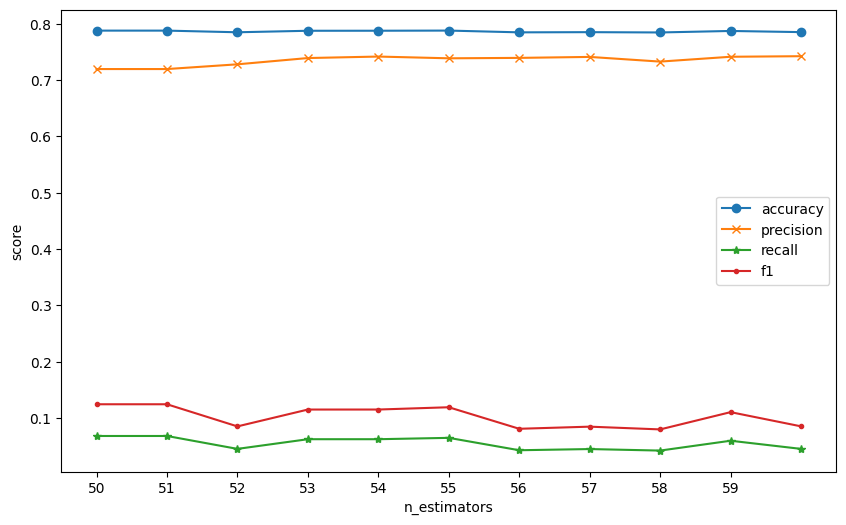

In [120]:
# polt the results
plt.figure(figsize=(10, 6))
plt.plot(bag_check_result['n_estimators'], bag_check_result['accuracy'], label='accuracy' , marker='o')
plt.plot(bag_check_result['n_estimators'], bag_check_result['precision'], label='precision', marker='x')
plt.plot(bag_check_result['n_estimators'], bag_check_result['recall'], label='recall', marker='*')
plt.plot(bag_check_result['n_estimators'], bag_check_result['f1'], label='f1', marker='.')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.xticks(range(50, 60)) # set the x axis ticks
plt.legend()
plt.show()

<p> The above graph demonstrates the performance of bagging by changing the n_estimators from 50 to 60. Even though the accuracy and precision remained at the same rate, metrics such as recall and F1 score has fluctuated constantly. </p>

In [121]:
# make predictions
bagging_y_pred = bagging_best.predict(X_test)

In [122]:
x1 = pd.DataFrame({'True': y_test, 'Predicted': bagging_y_pred})
x2 = pd.crosstab(x1['True'], x1['Predicted'])
x2

Predicted,0,1
True,,
0,11594,88
1,3092,226


<p> Visualising the confusion matrix of Bagging model. </p>

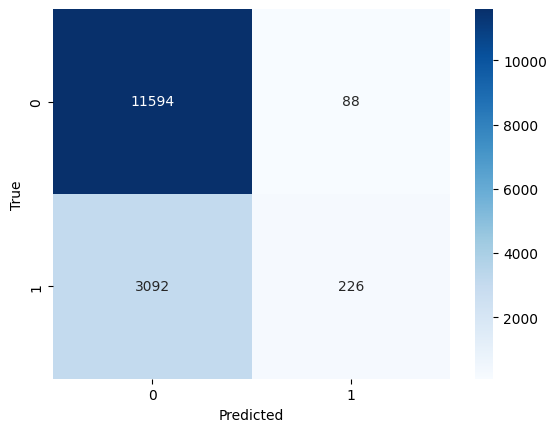

In [123]:
# plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(x2, annot=True, fmt='d', cmap='Blues')
plt.show()

In [124]:
bagging_metrics = calculate_metrics(x2)
print(bagging_metrics)

      Metric         Value
0         TP  11594.000000
1         TN    226.000000
2         FP   3092.000000
3         FN     88.000000
4  Precision      0.789459
5     Recall      0.992467
6   F1-Score      0.879399
7   Accuracy      0.788000


---

## AdaBoost
<p>Adaptive Boosting algorithm is an ensemble learning algorithm that combines mulitple weak learners into one strong learner. Adaboost sequentially trains on weak classifiers focusing on the examples that were missed by the previous classifier. The algorithm adpats to training data by giving more weights to the difficult learners and less weight to easy ones. </p>

In [125]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [126]:
adaBoost = AdaBoostClassifier()

adaBoost.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

<p> Listing all the possible parameters of Adaboost that could be used for gridsearch </p>

In [127]:
adaBoost_grid_params = {'n_estimators': [10,20,50],
                        'learning_rate': [0.1, 0.001, 0.0001],
                        'random_state': [42,1 ,14]
                        }

In [128]:
# fit the model
adaBoost_grid = GridSearchCV(adaBoost,
                            adaBoost_grid_params,
                            cv=5, # 5-fold cross validation
                            verbose=1,
                            n_jobs=-1
                            )

<p> Using the gridsearch parameters find the best params and best score by fitting the training set on gridsearch. </p>

In [129]:
# fit the model
adaBoost_grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.001, 0.0001],
                         'n_estimators': [10, 20, 50],
                         'random_state': [42, 1, 14]},
             verbose=1)

In [130]:
# print the best parameters
print(adaBoost_grid.best_params_)
print(adaBoost_grid.best_score_)

{'learning_rate': 0.1, 'n_estimators': 10, 'random_state': 42}
0.8219333333333333


In [131]:
#  create the model with the best parameters
adaBoost_best = adaBoost_grid.best_estimator_

<p> Evaluating the performance of AdaBoost model by increasing the number of estimator parameter </p>

In [132]:
ada_check_result = pd.DataFrame(columns=['n_estimators', 'accuracy', 'precision', 'recall', 'f1'])
# {'learning_rate': 0.1, 'n_estimators': 10, 'random_state': 42}
for i in range(10,21):
    n_estimators = i
    ada_check = AdaBoostClassifier(n_estimators=n_estimators,
                                    learning_rate=0.1,
                                    random_state=42
                                    )
    ada_check.fit(X_train, y_train)
    ada_check_pred = ada_check.predict(X_test)
    
    # calculate different metrics
    accuracy = accuracy_score(y_test, ada_check_pred)
    precision = precision_score(y_test, ada_check_pred )
    recall = recall_score(y_test, ada_check_pred)
    f1 = f1_score(y_test, ada_check_pred)
    
    # append the results to the dataframe
    ada_check_result = pd.concat([ada_check_result, pd.DataFrame({'n_estimators': i,
                                                                   'accuracy': accuracy,
                                                                   'precision': precision,
                                                                   'recall': recall,
                                                                   'f1': f1}, index=[0])],
                                 ignore_index=True)
    
ada_check_result

,n_estimators,accuracy,precision,recall,f1
0,10,0.817267,0.682711,0.324895,0.440270
1,11,0.817267,0.682711,0.324895,0.440270
2,12,0.817267,0.682711,0.324895,0.440270
3,13,0.817267,0.682711,0.324895,0.440270
4,14,0.817267,0.682711,0.324895,0.440270
5,15,0.817267,0.682711,0.324895,0.440270
6,16,0.817267,0.682711,0.324895,0.440270
7,17,0.817267,0.682711,0.324895,0.440270
8,18,0.817267,0.682711,0.324895,0.440270
9,19,0.817267,0.682711,0.324895,0.440270


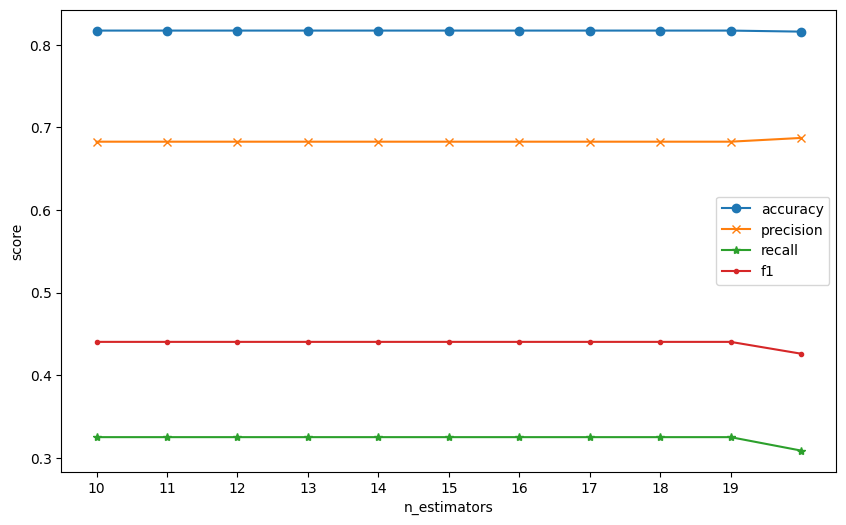

In [133]:
# polt the results
plt.figure(figsize=(10, 6))
plt.plot(ada_check_result['n_estimators'], ada_check_result['accuracy'], label='accuracy' , marker='o')
plt.plot(ada_check_result['n_estimators'], ada_check_result['precision'], label='precision', marker='x')
plt.plot(ada_check_result['n_estimators'], ada_check_result['recall'], label='recall', marker='*')
plt.plot(ada_check_result['n_estimators'], ada_check_result['f1'], label='f1', marker='.')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.xticks(range(10, 20)) # set the x axis ticks
plt.legend()
plt.show()

<p> The above graph display the performance of Adaboost by increasing the "n_estimators". Accuracy and Precision remained constant throughout but recall and F1 score dropped at the last "n_estimator". </p>

In [134]:
# make predictions
adaBoost_y_pred = adaBoost_best.predict(X_test)

<p> Creating a Confusion Matrix to calculate the accuracy, precision, recall and F1-score of AdaBoost model. </p>

In [135]:
x1 = pd.DataFrame({'True': y_test, 'Predicted': adaBoost_y_pred})
x2 = pd.crosstab(x1['True'], x1['Predicted'])
x2

Predicted,0,1
True,,
0,11181,501
1,2240,1078


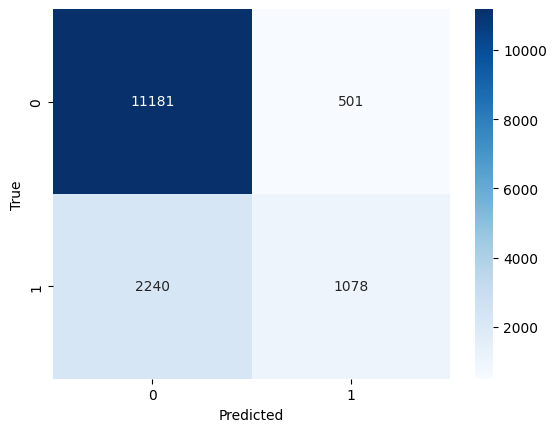

In [136]:
# plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(x2, annot=True, fmt='d', cmap='Blues')
plt.show()

In [137]:
adaBoost_metrics = calculate_metrics(x2)
print(adaBoost_metrics)

      Metric         Value
0         TP  11181.000000
1         TN   1078.000000
2         FP   2240.000000
3         FN    501.000000
4  Precision      0.833097
5     Recall      0.957114
6   F1-Score      0.890810
7   Accuracy      0.817267


-------

## SVM
<p> Support Vector Machine (SVM) is a supervised learning algorithm that finds a hyperplane that can best sperate the classes in the feature space. In the case of binary classification SVM will find the a hyperplane that can maximise the margin between the two classes. SVM can be used on linearly seperable and non-linearly seperable datasets. </p>

In [138]:
# import svm from sklearn
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [139]:
svm = SVC()

svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

<p> Retrieving all possible parameters of SVM that can be used for gridsearch. </p>

In [140]:
svm_grid_params = { 'C': [0.1, 1, 10],
                    'kernel': ['linear', 'rbf', 'poly'],
                    'degree': [2, 3, 4]
                    }

In [141]:
#  fit the model
svm_grid = GridSearchCV(svm,
                        svm_grid_params,
                        cv=5, # 5-fold cross validation
                        verbose=1,
                        n_jobs=-1
                        )

In [142]:
# fit the model
svm_grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=1)

In [143]:
# print the best parameters
print(svm_grid.best_params_)
print(svm_grid.best_score_)

{'C': 1, 'degree': 2, 'kernel': 'rbf'}
0.8185333333333332


<p> Once the best parameters are found, then we will use these to find the best SVM model. </p>

In [144]:
# create the model with the best parameters
svm_best = svm_grid.best_estimator_

<p> Evaluating the performance of SVM by increasing the hyperparameter "C". </p>

In [145]:
svm_check_result = pd.DataFrame(columns=['C', 'accuracy', 'precision', 'recall', 'f1'])
# {'C': 1, 'degree': 2, 'kernel': 'rbf'}
for i in range(1,11):
    C = i
    svm_check = SVC(C=C,
                    kernel='rbf',
                    degree=2
                    )
    svm_check.fit(X_train, y_train)
    svm_check_pred = svm_check.predict(X_test)
    
    # calculate different metrics
    accuracy = accuracy_score(y_test, svm_check_pred)
    precision = precision_score(y_test, svm_check_pred )
    recall = recall_score(y_test, svm_check_pred)
    f1 = f1_score(y_test, svm_check_pred)
    
    # append the results to the dataframe
    svm_check_result = pd.concat([svm_check_result, pd.DataFrame({'C': i,
                                                                   'accuracy': accuracy,
                                                                   'precision': precision,
                                                                   'recall': recall,
                                                                   'f1': f1}, index=[0])],
                                 ignore_index=True)

svm_check_result

,C,accuracy,precision,recall,f1
0,1,0.818333,0.700745,0.311935,0.431700
1,2,0.819000,0.698748,0.319470,0.438469
2,3,0.819000,0.695652,0.323086,0.441243
3,4,0.818933,0.692949,0.325799,0.443214
4,5,0.818867,0.689829,0.329114,0.445623
5,6,0.818267,0.683623,0.332128,0.447059
6,7,0.818200,0.680955,0.335142,0.449202
7,8,0.818067,0.678377,0.337553,0.450795
8,9,0.817200,0.672043,0.339060,0.450721
9,10,0.817133,0.670623,0.340567,0.451729


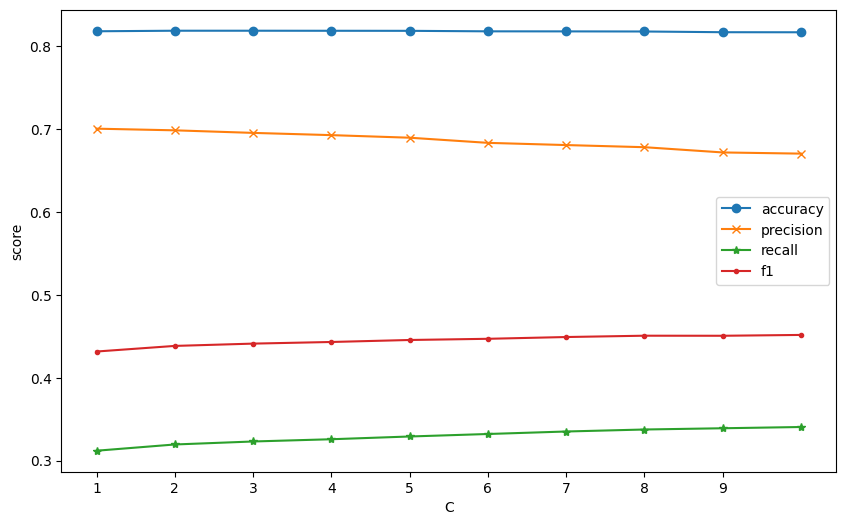

In [146]:
# plot the results
plt.figure(figsize=(10, 6))
plt.plot(svm_check_result['C'], svm_check_result['accuracy'], label='accuracy' , marker='o')
plt.plot(svm_check_result['C'], svm_check_result['precision'], label='precision', marker='x')
plt.plot(svm_check_result['C'], svm_check_result['recall'], label='recall', marker='*')
plt.plot(svm_check_result['C'], svm_check_result['f1'], label='f1', marker='.')
plt.xlabel('C')
plt.ylabel('score')
plt.xticks(range(1, 10)) # set the x axis ticks
plt.legend()
plt.show()

<p> The above graph shows the performance of SVM by increasing the hyperparamter "C". It is clear the precision rate has decreased when the value of "C" increased, whereas metrics such as recall and F1-score has increased with the value of "C". </p>

In [147]:
# make predictions
svm_y_pred = svm_best.predict(X_test)

In [148]:
x1 = pd.DataFrame({'True': y_test, 'Predicted': svm_y_pred})
x2 = pd.crosstab(x1['True'], x1['Predicted'])
x2

Predicted,0,1
True,,
0,11240,442
1,2283,1035


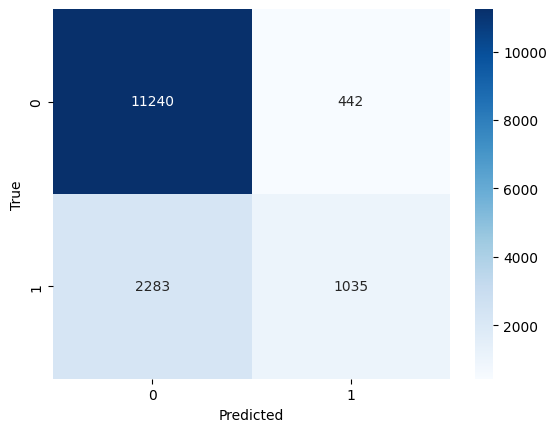

In [149]:
# plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(x2, annot=True, fmt='d', cmap='Blues')
plt.show()

In [150]:
svm_metrics = calculate_metrics(x2)
print(svm_metrics)

      Metric         Value
0         TP  11240.000000
1         TN   1035.000000
2         FP   2283.000000
3         FN    442.000000
4  Precision      0.831177
5     Recall      0.962164
6   F1-Score      0.891887
7   Accuracy      0.818333


----

# Summary

In [191]:
# get the values of the metrics
knn_metrics_value = knn_metrics.drop('Metric', axis=1)
decisionTree_metrics_value = decisionTree_metrics.drop('Metric', axis=1)
randomForest_metrics_value = randomForest_metrics.drop('Metric', axis=1)
adaBoost_metrics_value = adaBoost_metrics.drop('Metric', axis=1)
svm_metrics_value = svm_metrics.drop('Metric', axis=1)

In [201]:
# create a metrics lable datafram with column name 'metric'and type of metrics
metrics_lable = knn_metrics['Metric']

In [205]:
# concatenate the metrics with given names 
metrics_summary = pd.concat([metrics_lable, knn_metrics_value, decisionTree_metrics_value, randomForest_metrics_value, adaBoost_metrics_value, svm_metrics_value], axis=1)
metrics_summary.columns = ['Metric', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'SVM']

In [206]:
metrics_summary

,Metric,KNN,Decision Tree,Random Forest,AdaBoost,SVM
0,TP,11228.000000,11159.000000,11141.000000,11181.000000,11240.000000
1,TN,850.000000,1030.000000,1133.000000,1078.000000,1035.000000
2,FP,2468.000000,2288.000000,2185.000000,2240.000000,2283.000000
3,FN,454.000000,523.000000,541.000000,501.000000,442.000000
4,Precision,0.819801,0.829851,0.836035,0.833097,0.831177
5,Recall,0.961137,0.955230,0.953689,0.957114,0.962164
6,F1-Score,0.884861,0.888137,0.890995,0.890810,0.891887
7,Accuracy,0.805200,0.812600,0.818267,0.817267,0.818333


<p>We have built 6 models, they are KNN, Decision Tree, Random Forest, Bagging, AdaBoost and SVM. Among the 6 models, SVM scored better accuracy with 0.8183 slightly better Random Forest which had accuracy of 0.8182. Because the values of both algorithms were closer to each other, we have considered using other evaluation metrics. The above table shows the results. Random Forest had better precision than SVM as Random Forest scored 0.836 whereas SVM scored 0.831. Again these values are in closer range. The next test was to look at the recall rate. SVM scored better recall with 0.962. SVM also had a better F1-score with 0.891. Overall SVM scored better than all the other 5 algorithms in Accuracy, Recall and F1-score. This suggests that SVM is the best model. </p>

<h2> References: </h2>
<p><a href = "https://vitalflux.com/correlation-heatmap-with-seaborn-pandas/"> Correlation with seaborn </a> accessed on 15/03/2023 </p>
<p> <a href = "https://analyticsindiamag.com/why-data-scaling-is-important-in-machine-learning-how-to-effectively-do-it/"> Importance of Data Scaling </a> accessed on 15/03/2023 </p>
<p> <a href = "https://www.ibm.com/topics/knn"> K Nearest Neighbour </a> accessed on 15/03/2023 </p>
<p> <a href = "https://www.ibm.com/topics/decision-trees"> Decision Tree </a> accessed on 15/03/2023 </p>
<p> <a href = "https://www.ibm.com/topics/random-forest"> Random Forest </a> accessed on 15/03/2023 </p>
<p> <a href = "https://www.ibm.com/topics/bagging" > Bagging </a> accessed on 15/03/2023 </p>
<p> <a href = "https://www.machinelearningplus.com/machine-learning/introduction-to-adaboost/"> AdaBoost </a> accessed on 15/03/2023 </p>
<p> <a href = "https://www.springboard.com/blog/data-science/svm-algorithm/"> SVM </a> accessed on 15/03/2023 </p>
<p> Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep learning. MIT Press.</p>
<p>Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow </p>